In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Gaussian mixture models

The Gaussian mixture model (GMM) can be viewed as an extension of *k*-means clustering which is capable of overcoming some of the shortcomings. 
The GMM attempts to find a mixture of multidimensional Gaussian probability distributions that best model any input dataset. 
This is a probabilistic model, so it is possible to find probabilistic cluster assignments, this is shown for the blob example from the previous section below. 

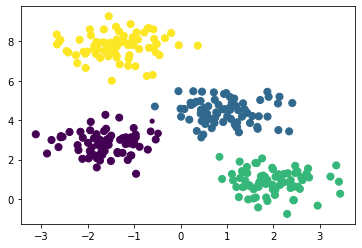

In [11]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
probs = gmm.predict_proba(X)
size = 50 * probs.max(axis=1) ** 2
plt.scatter(X[:, 0], X[:, 1], c=labels, s=size)
plt.show()

We can see that the points that are near the boundaries between different clusters have less certainty (represented by a smaller size) about the cluster they are in.

The GMM is very similar to *k*-means; using an expectation-maximisation approach that qualitatively does the following: 
1. Choose starting guesses for the location and shape
2. Repeat the following until converged: 
    1. E-step: for each point, find weights encoding the probability of membership in each cluster
    2. M-step: for each cluster, update its location, normalisation, and shape based on *all* data points, making use of the weights

As a result of this probabilistic approach, each cluster is associated not with a hard-edged sphere, but a smooth Gaussian model. 
This methodology, like standard *k*-means, suffers that it is possible to miss this global minima, so in practice multiple random initialisations are used. 
The fact that Gaussian models are used means that the cluster shapes do not need to be circular. 

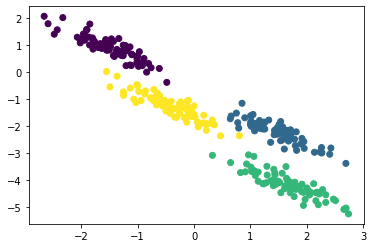

In [12]:
X_stretched = np.dot(X, np.random.randn(2, 2))
gmm = GaussianMixture(n_components=4, covariance_type='full')
labels = gmm.fit(X_stretched).predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels)
plt.show()

Note above, we stated that the `covariance_type` should be `'full'`. 
This hyperparameter defines the shape of the Gaussian models that are used for each cluster, `'full'` indicates that the cluster should be modelled as an ellipse with an arbitrary orientation.